Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  flat
done with rho plot in  20.483253002166748  seconds
done with B Squared plot in  28.333242416381836  seconds
done with alpha plot in  24.112845182418823  seconds
done with stress plot in  23.906583070755005  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  0.25
done with rho plot in  48.34566831588745  seconds
done with B Squared plot in  28.445273876190186  seconds
done with alpha plot in  24.320618629455566  seconds
done with stress plot in  24.346146821975708  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  68.82328248023987  seconds
done with B Squared plot in  28.509510278701782  seconds
done with alpha plot in  24.249582529067993  seconds
done with stress plot in  24.33944582939148  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  5
done with rho plot in  68.4421594142

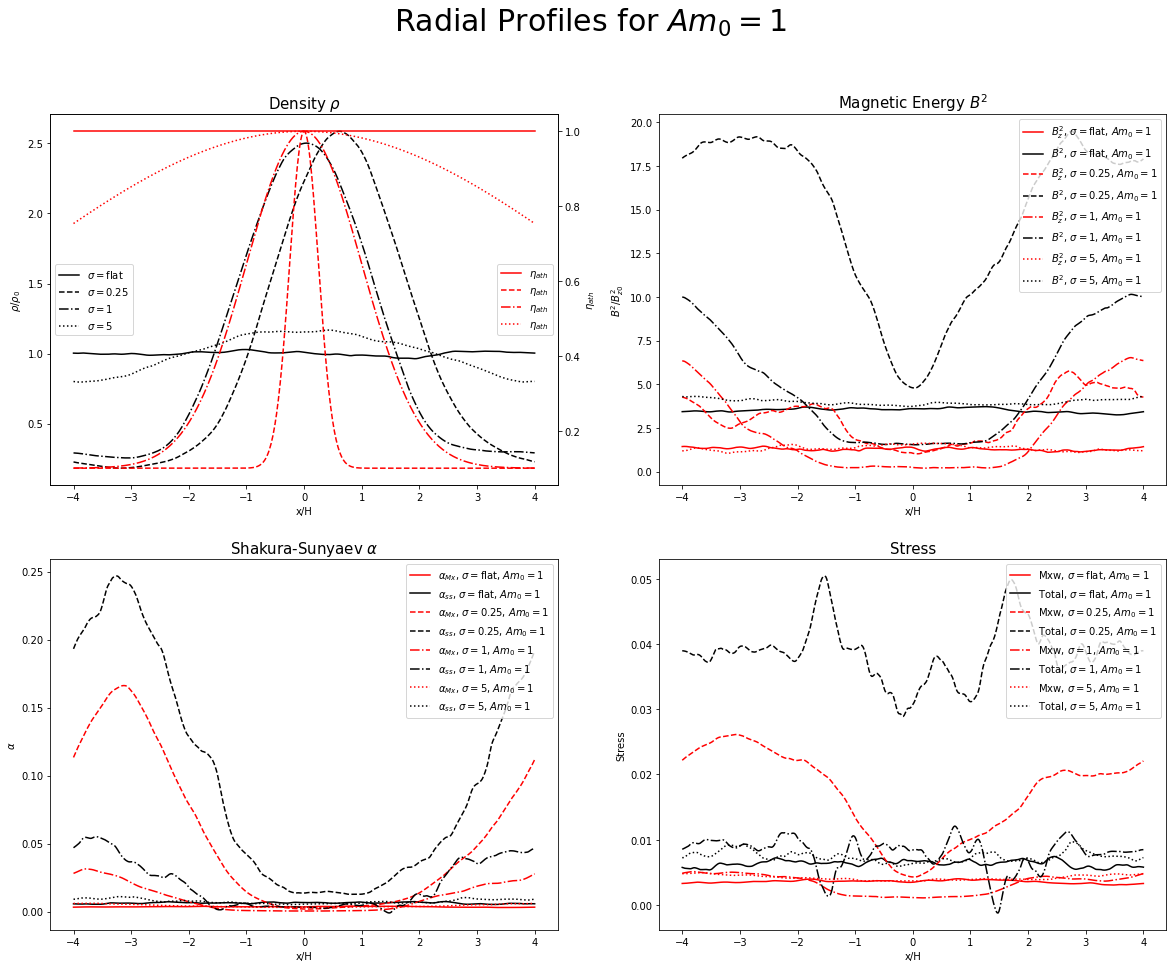

In [5]:
#plot multiple runs on the same set of axes, limit 4 per customer

#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 1$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

def summary_plots(file_path_list,fig,ax):
    #set list of line styles for discerning different runs
    style_list = ['solid','dashed','dashdot','dotted']
    #setup axis overlay for eta profiles  
    ax2 = ax[0,0].twinx()
    ax2.set_ylabel('$\\eta_{ath}$')
    for file_path in file_path_list:
        #plot the four requested plots for a given filepath, but keep the axes the same for all
        #read amplitude and sign and sigma
        sgn = 1
        amp = 1
        sig = 1
        eta = 1
        if 'sig_point25' in file_path:
            sig = .25
            style = 'dashed'
        if 'sig_1' in file_path:
            sig = 1
            style = 'dashdot'
        if 'sig_5' in file_path:
            sig = 5
            style = 'dotted'
        if 'inv'in file_path:
            sgn = -1
        if 'amp_point5'in file_path:
            amp = .5
            eta = 1/amp
            #style = 'dashed'
        if 'amp_1' in file_path:
            amp = 1
            eta = 1/amp
            #style = 'dotdash'
        if 'amp_5' in file_path:
            amp = 5
            eta = 1/amp
            #style = 'dotted'
        if 'const' in file_path:
            sig = 'flat'
            style = 'solid'
        #density but don't include percentiles
        print('Figure set up; current parameters are: sign = ',sgn,', amplitude = ',amp,', sigma = ',sig)
        #rho plot -----------------------------------------------------------------
        rho_time = time.time()
        prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file_path)
        ax[0,0].plot(x_arr,prof_rho,'k',linestyle=style,label=str('$\sigma =$'+str(sig)))
        #ax[0,0].fill_between(x_arr,lower_rho,upper_rho,color ='c')
        ax[0,0].legend(loc=6)
        ax[0,0].set_xlabel('x/H')
        ax[0,0].set_ylabel('$\\rho/\\rho_0$')
        subtitle = 'Density $\\rho$'
        ax[0,0].set_title(subtitle)
        print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
        #overlay the eta profile

        if sgn == -1:
            if sig == 'flat':
                y_array = eta * (x_arr**0) #force to have same length as x arr
            else:    
                y_array = eta*(1-.9*np.exp(-(x_arr**2)/(2*(sig**2)))) 
        if sgn == 1:
            if sig == 'flat':
                y_array = eta * (x_arr**0) #force to have same length as x arr
            else: 
                y_array = eta*(.9*np.exp(-(x_arr**2)/(2*(sig**2)))+.1) 
        ax2.plot(x_arr,y_array,'r',linestyle=style,label = '$\\eta_{ath}$' )
        ax2.legend(loc=7)
        
        #magnetic energy plot------------------------------------------------------------------------
        mag_time = time.time()
        #Bz0 as set by initial plasma beta
        Bzsquared0 = 2/400
        prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_bsquared_prof(file_path)
        #ax[0,1].semilogy(x_arr,prof_bx/Bzsquared0,'b',linestyle=style,label =('$B_x^2$, $\sigma=$'+str(sig))+', $Am_0=$'+str(amp))
        #ax[0,1].plot(x_arr,prof_by/Bzsquared0,'r',linestyle=style,label ='$B_y^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].plot(x_arr,prof_bz/Bzsquared0,'r',linestyle=style,label ='$B_z^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].plot(x_arr,prof_bmag/Bzsquared0,'k',linestyle=style,label ='$B^2$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[0,1].legend(loc=1)
        ax[0,1].set_xlabel('x/H')
        ax[0,1].set_ylabel('$B^2/B_{z0}^2$')
        subtitle = 'Magnetic Energy $B^2$'
        ax[0,1].set_title(subtitle)
        print('done with B Squared plot in ',(time.time()-mag_time),' seconds')
        #shakura sunyaev alpha--------------------------------------------------------------------------
        alpha_time = time.time()
        prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
        #ax[1,0].plot(x_arr,prof_avg_reyn,'b',linestyle=style,label='$\\alpha_{Re}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].plot(x_arr,prof_avg_maxw,'r',linestyle=style,label='$\\alpha_{Mx}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].plot(x_arr,(prof_avg_tot),'k',linestyle=style,label='$\\alpha_{ss}$, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,0].legend(loc=1)
        ax[1,0].set_xlabel('x/H')
        ax[1,0].set_ylabel('$\\alpha$')
        subtitle = 'Shakura-Sunyaev $\\alpha$'
        ax[1,0].set_title(subtitle)
        print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
        #stress
        stress_time = time.time()
        prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
        #ax[1,1].plot(x_arr,prof_avg_reyn,'b',linestyle=style,label='Re, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].plot(x_arr,prof_avg_maxw,'r',linestyle=style,label='Mxw, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].plot(x_arr,(prof_avg_tot),'k',linestyle=style,label='Total, $\sigma=$'+str(sig)+', $Am_0=$'+str(amp))
        ax[1,1].legend(loc=1)
        ax[1,1].set_xlabel('x/H')
        ax[1,1].set_ylabel('Stress')
        subtitle = 'Stress'
        ax[1,1].set_title(subtitle)   
        print('done with stress plot in ',(time.time()-stress_time),' seconds')
    return ('done')
    
    
    
file_path_list = [
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_1_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  flat
done with rho plot in  78.89311718940735  seconds
done with B Squared plot in  28.23053503036499  seconds
done with alpha plot in  24.169588088989258  seconds
done with stress plot in  23.84187626838684  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  68.4967749118805  seconds
done with B Squared plot in  28.170275926589966  seconds
done with alpha plot in  24.18445372581482  seconds
done with stress plot in  23.969008445739746  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  1
done with rho plot in  70.95024013519287  seconds
done with B Squared plot in  28.106756925582886  seconds
done with alpha plot in  24.22226095199585  seconds
done with stress plot in  23.902799606323242  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  5
done with rho plot in  71.2112455

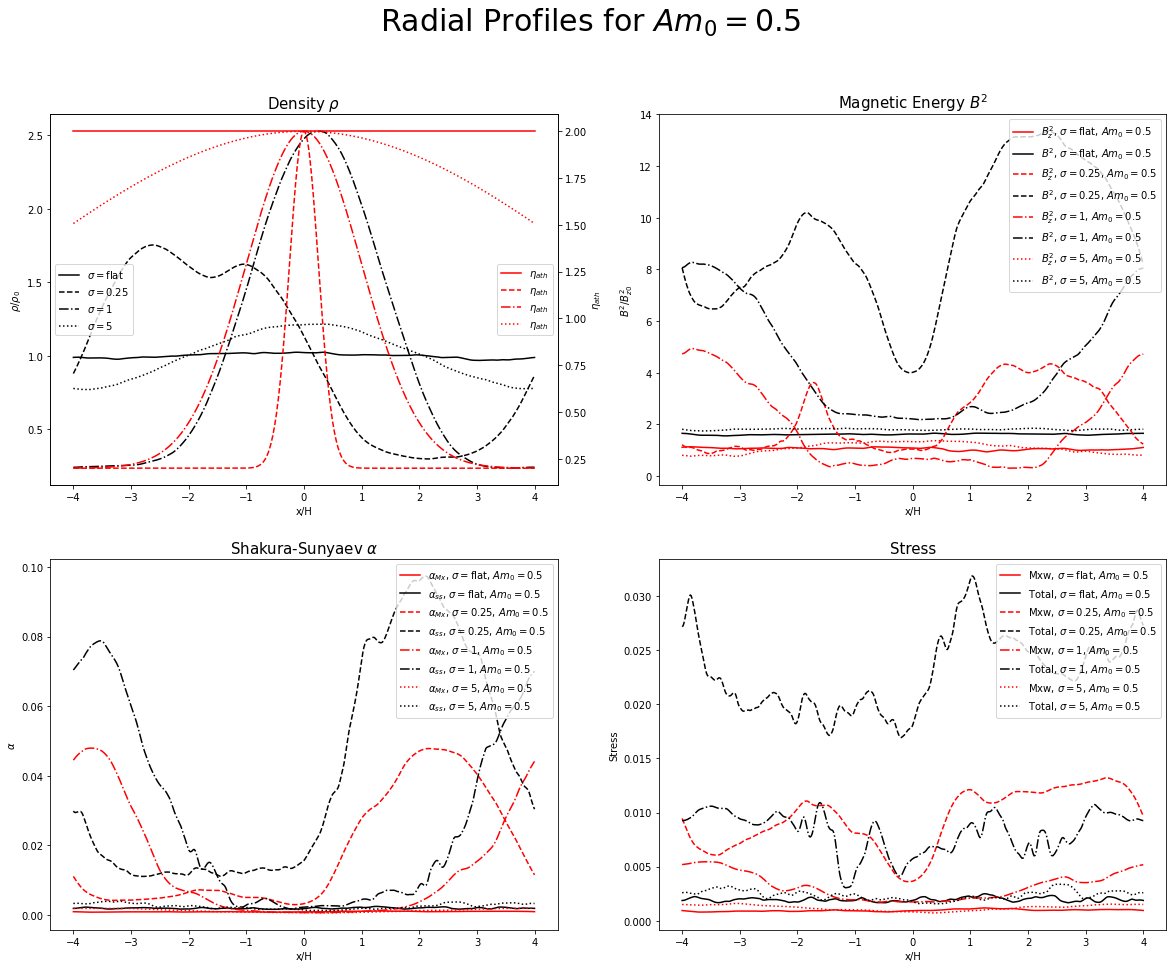

In [6]:
#same but for Am_0 = .5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 0.5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_point5_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  flat
done with rho plot in  75.41551685333252  seconds
done with B Squared plot in  28.044421672821045  seconds
done with alpha plot in  24.008328437805176  seconds
done with stress plot in  23.757418870925903  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  0.25
done with rho plot in  64.56398367881775  seconds
done with B Squared plot in  28.063956260681152  seconds
done with alpha plot in  24.02560806274414  seconds
done with stress plot in  23.71897554397583  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  1
done with rho plot in  65.19269490242004  seconds
done with B Squared plot in  28.202364921569824  seconds
done with alpha plot in  24.415313482284546  seconds
done with stress plot in  23.815272569656372  seconds
Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  5
done with rho plot in  62.314677238464

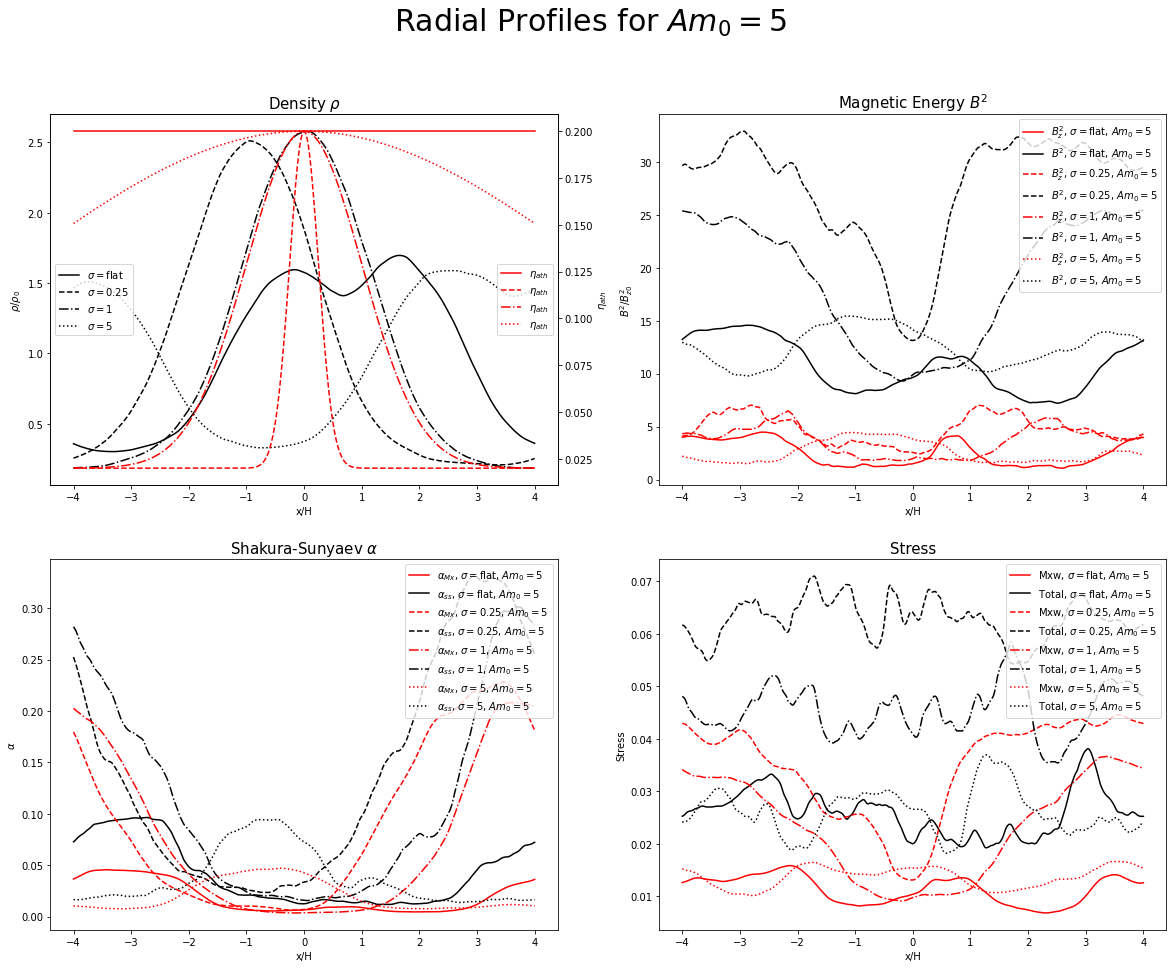

In [7]:
#same but for Am_0 = 5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/sig_point25",
    "./ad_prof/amp_5/sig_1",
    "./ad_prof/amp_5/sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_5_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  flat
done with rho plot in  75.41436386108398  seconds
done with B Squared plot in  29.174059629440308  seconds
done with alpha plot in  24.93246078491211  seconds
done with stress plot in  25.65099287033081  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  0.25
done with rho plot in  73.19430661201477  seconds
done with B Squared plot in  29.646674394607544  seconds
done with alpha plot in  25.43252205848694  seconds
done with stress plot in  25.240780353546143  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  1
done with rho plot in  71.09981274604797  seconds
done with B Squared plot in  29.369861841201782  seconds
done with alpha plot in  25.1040940284729  seconds
done with stress plot in  24.94229817390442  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  5
done with rho plot in  72.2616953849792

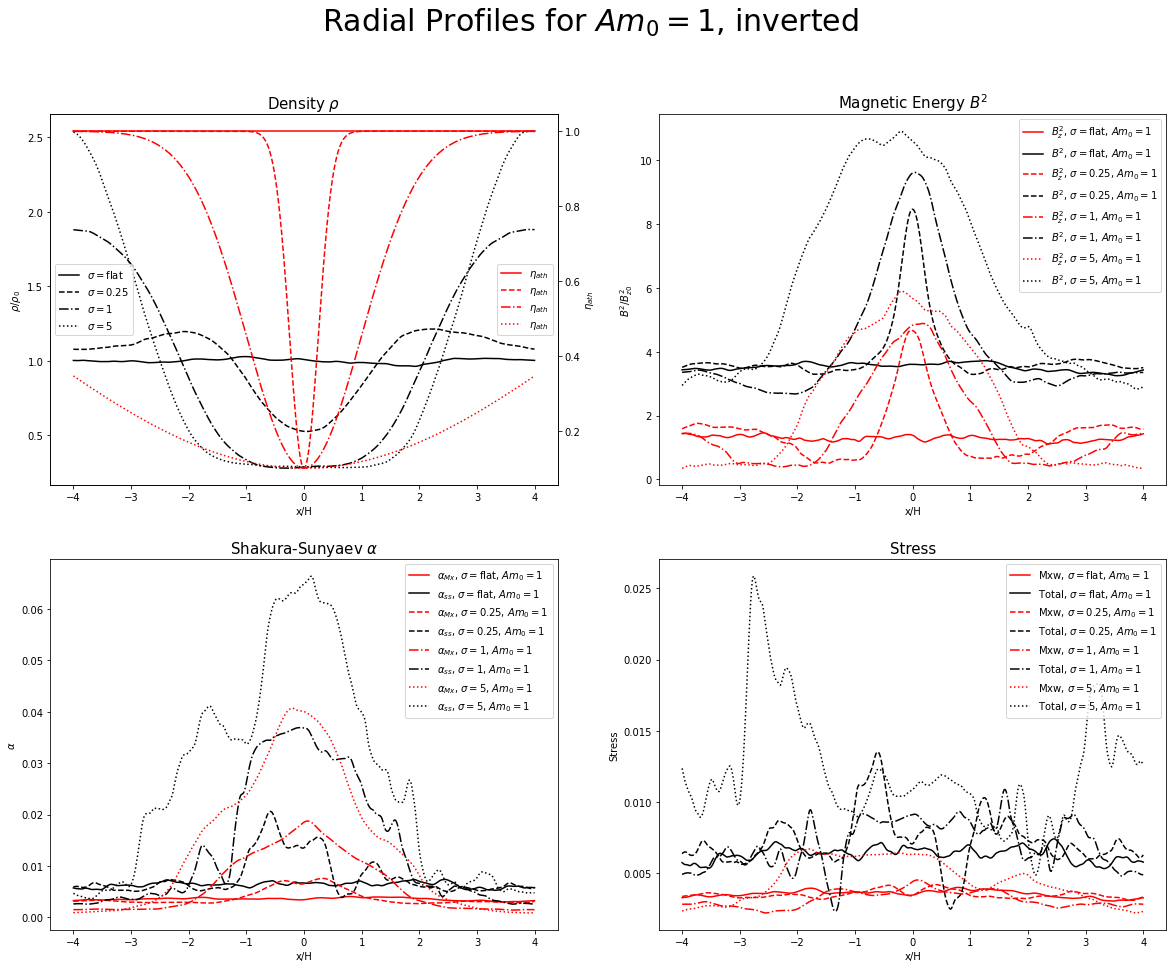

In [11]:
#same but for inverted amp 1
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=1
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 1$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_1_inverted_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  flat
done with rho plot in  79.08808159828186  seconds
done with B Squared plot in  28.03896403312683  seconds
done with alpha plot in  24.106135845184326  seconds
done with stress plot in  23.937633991241455  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  70.0103828907013  seconds
done with B Squared plot in  28.231274366378784  seconds
done with alpha plot in  24.18105697631836  seconds
done with stress plot in  23.77331280708313  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  1
done with rho plot in  67.20539999008179  seconds
done with B Squared plot in  28.30036473274231  seconds
done with alpha plot in  24.53075647354126  seconds
done with stress plot in  23.862766981124878  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  5
done with rho plot in  66.28040

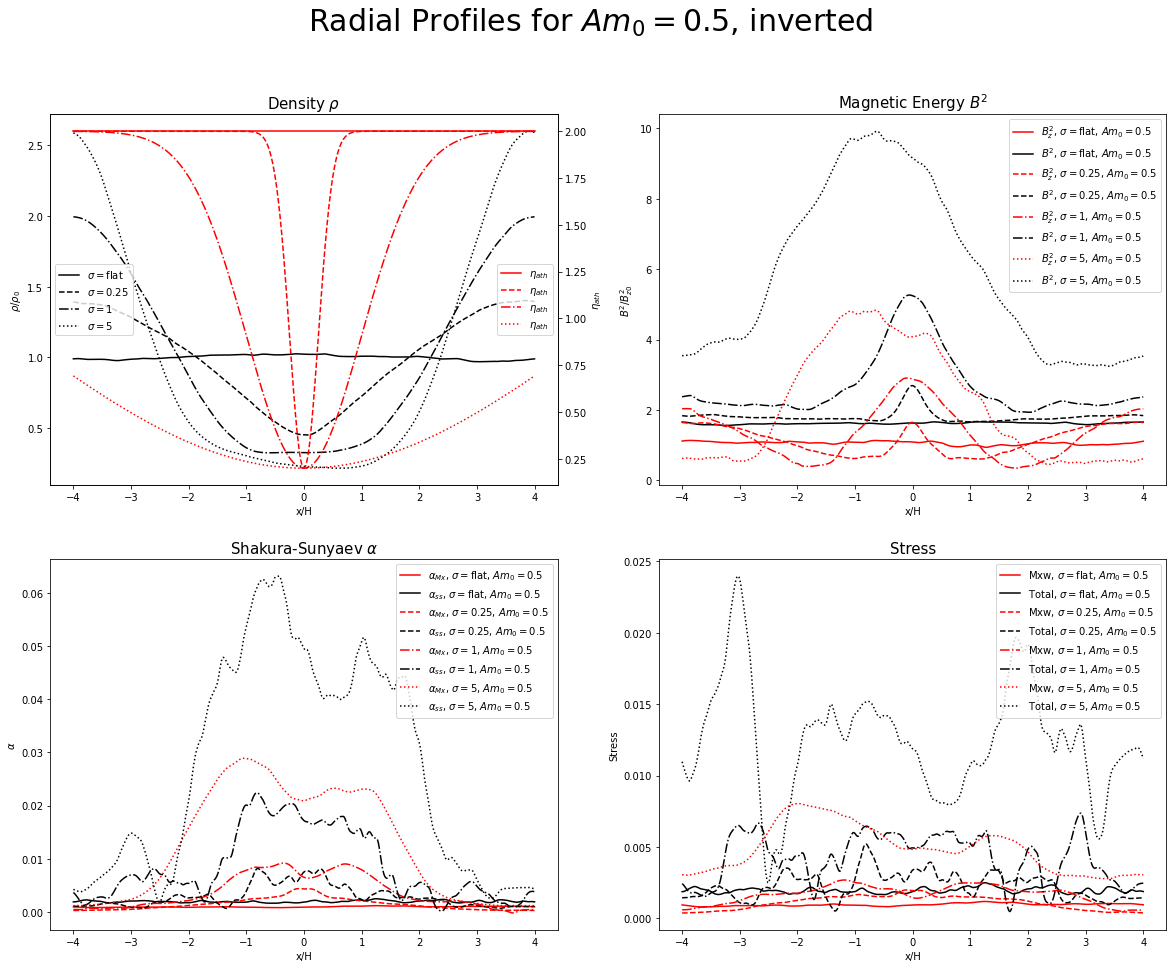

In [9]:
#same but for inverted amp point5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=0.5
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 0.5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_point5_inverted_summary_plots.pdf')
plt.show()

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  flat
done with rho plot in  75.74584984779358  seconds
done with B Squared plot in  28.347239017486572  seconds
done with alpha plot in  24.031145334243774  seconds
done with stress plot in  23.688105821609497  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  0.25
done with rho plot in  63.58996868133545  seconds
done with B Squared plot in  28.308027505874634  seconds
done with alpha plot in  24.13906741142273  seconds
done with stress plot in  23.916510820388794  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  1
done with rho plot in  64.42712831497192  seconds
done with B Squared plot in  28.494762897491455  seconds
done with alpha plot in  24.127712726593018  seconds
done with stress plot in  23.782787084579468  seconds
Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  5
done with rho plot in  62.96029806

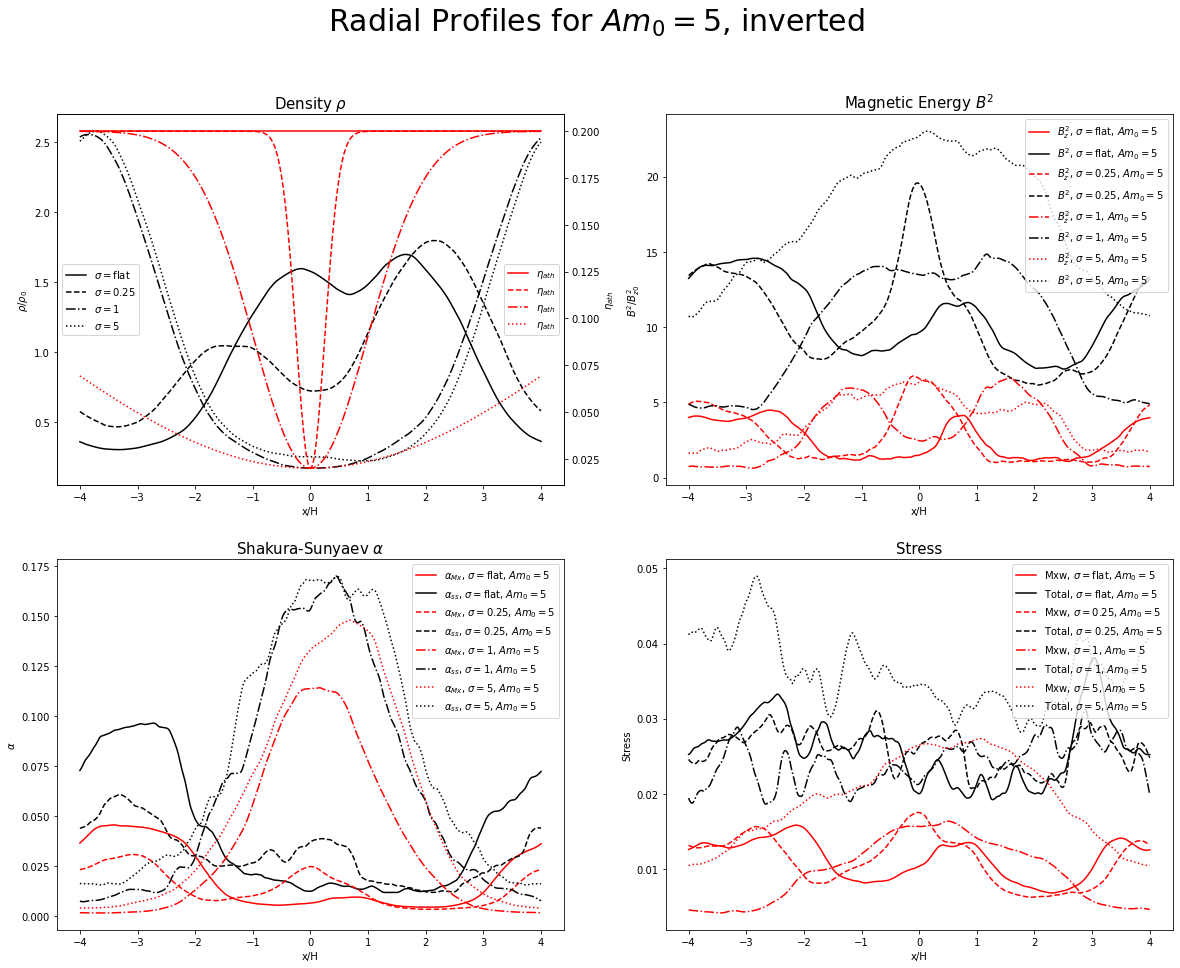

In [10]:
#same but for inverted amp 5
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)


#overarching parameters
sgn=-1
amp=5
#set up figure

#figure setup---------------------------------------------------------------
#adjust font sizes
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
    
fig1,axes = plt.subplots(nrows=2,ncols=2)
    #fig2,ax2 = plt.subplots(3,2)
fig1.set_size_inches(20,15)
sptitle = 'Radial Profiles for $Am_0 = 5$'
if sgn == -1:
    sptitle = sptitle+', inverted'
fig1.suptitle(sptitle,fontsize=30)

#file list
file_path_list = [
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/inv_sig_point25",
    "./ad_prof/amp_5/inv_sig_1",
    "./ad_prof/amp_5/inv_sig_5" 
]

print(summary_plots(file_path_list,fig1,axes))
fig1.savefig('./thesis_images/amp_5_inverted_summary_plots.pdf')
plt.show()
